# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Los datos que debería conocer son : los m2, el tipo de casa, su ubicación, el estado de la casa, el precio del dolar y la oferta y demanda para cada caso.

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# IMPORTACIÓN DE LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
data = pd.read_csv('C:/Users/Riggio/Desktop/Tel/Data Science/proyecto_1/DS_Proyecto_01_Datos_Properati.csv')

In [3]:
data.shape

(146660, 19)

In [4]:
data.head

<bound method NDFrame.head of         start_date    end_date  created_on        lat        lon         l1  \
0       2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1       2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2       2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3       2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4       2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   
...            ...         ...         ...        ...        ...        ...   
146655  2019-07-31  2019-08-13  2019-07-31 -34.816348 -58.181963  Argentina   
146656  2019-07-31  2019-08-14  2019-07-31 -34.446459 -58.937810  Argentina   
146657  2019-07-31  2019-08-14  2019-07-31 -34.444633 -58.981606  Argentina   
146658  2019-07-31  2019-08-14  2019-07-31 -34.444830 -58.981796  Argentina   
146659  2019-07-31  2019-10-12  2019-07-31 -34.444760 -58.981885  Argentina   

                     

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [5]:
data.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [6]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Departamento'),
  Text(1, 0, 'PH'),
  Text(2, 0, 'Casa'),
  Text(3, 0, 'Lote'),
  Text(4, 0, 'Casa de campo'),
  Text(5, 0, 'Oficina'),
  Text(6, 0, 'Otro'),
  Text(7, 0, 'Local comercial'),
  Text(8, 0, 'Cochera'),
  Text(9, 0, 'Depósito')])

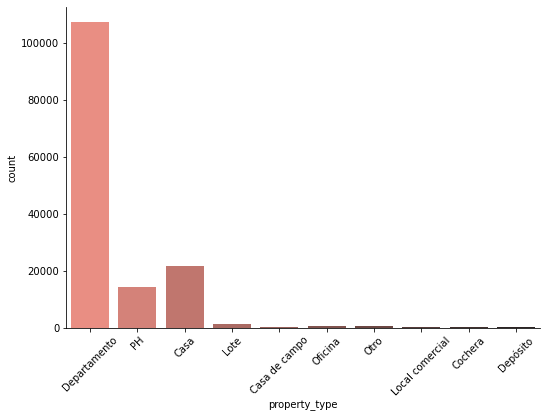

In [7]:
sns.catplot(x="property_type", aspect=1.5, kind="count", palette= "dark:salmon_r", data=data)
plt.xticks(rotation=45)

### De los 10 tipos de casa publicados en este dataset, con este gráfico podemos ver que la mayor cantidad corresponde al tipo Departamento, le sigue Casa y en tercer lugar se encuentra PH

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

## Verificando regiones..


In [8]:
# hice varios intentos con subplot y no quedé conforme, voy por lo que me salió primero (un catplot)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]),
 [Text(0, 0, 'San Cristobal'),
  Text(1, 0, 'Boedo'),
  Text(2, 0, 'Palermo'),
  Text(3, 0, 'La Plata'),
  Text(4, 0, 'Villa Crespo'),
  Text(5, 0, 'Parque Patricios'),
  Text(6, 0, 'Villa Pueyrredón'),
  Text(7, 0, 'Pilar'),
  Text(8, 0, 'Tigre'),
  Text(9, 0, 'Abasto'),
  Text(10, 0, 'Flores'),
  Text(11, 0, 'Morón'),
  Text(12, 0, 'Nuñez'),
  Text(13, 0, 'Almagro'),
  Text(14, 0, 'Belgrano'),
  Text(15, 0, 'Floresta'),
  Text(16, 0, 'Recoleta'),
  Text(17, 0, 'Balvanera'),
  Text(18, 0, 'Caballito'),
  Text(19, 0, 'Chacarita'),
  Text(20, 0, 'San Telmo'),
  Text(21, 0, 'Colegiales'),


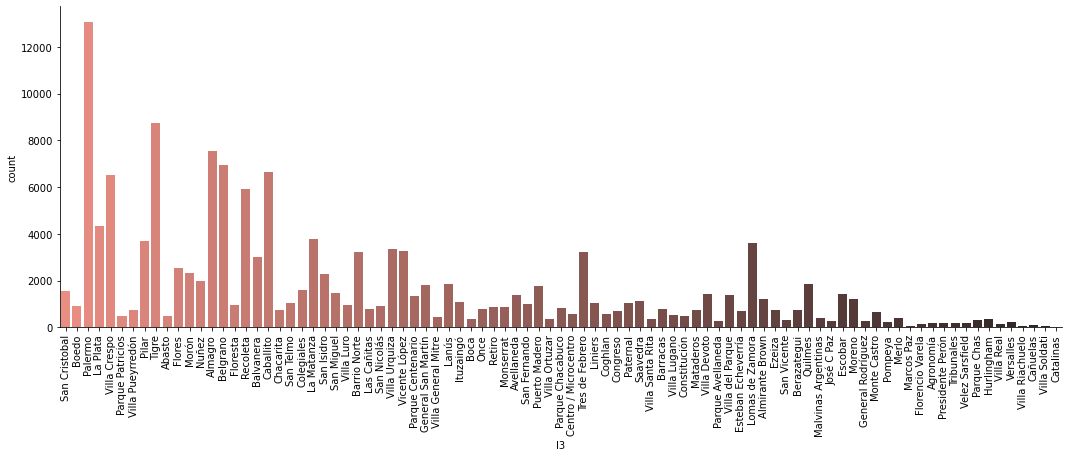

In [9]:
sns.catplot(x="l3", aspect=3 , kind="count", palette= "dark:salmon_r", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Capital Federal'),
  Text(1, 0, 'Bs.As. G.B.A. Zona Sur'),
  Text(2, 0, 'Bs.As. G.B.A. Zona Norte'),
  Text(3, 0, 'Bs.As. G.B.A. Zona Oeste')])

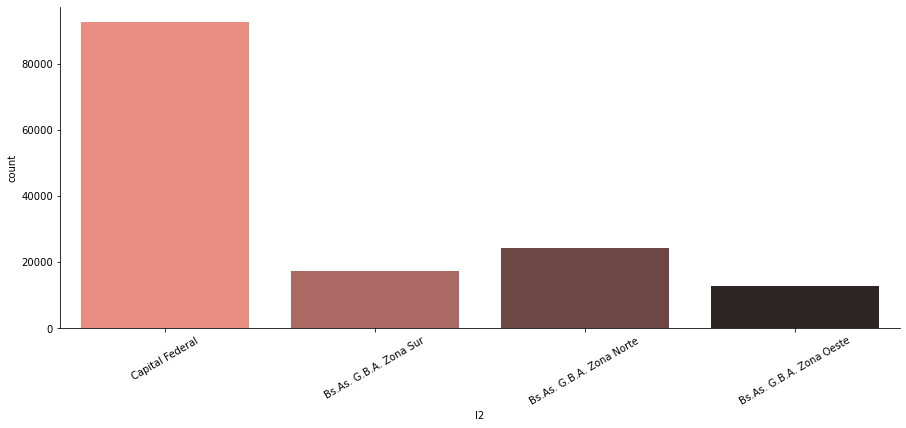

In [10]:
sns.catplot(x="l2", aspect=2.5, kind="count", palette= "dark:salmon_r", data=data)
plt.xticks(rotation=30)

## Según este catplot podemos observar que Capital Federal es la región con mayor cantidad de inmuebles del dataset

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [11]:
# dataset nuevo con las tres clases más abundantes de tipos de casa
df = data[(data['property_type'] == 'Departamento') | (data['property_type'] =='Casa') | (data['property_type'] == 'PH')]

In [12]:
# reduzco un poco más la información para centrarme solo en la región con más propiedades publicadas
df = df[df['l2'] == 'Capital Federal']
df.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [13]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
dataframe2 = df[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

# ahora voy a analizar cada variable


<AxesSubplot:xlabel='rooms'>

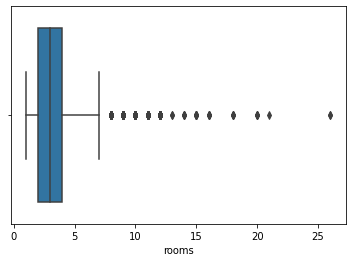

In [14]:
sns.boxplot(data = df, x = 'rooms')

<AxesSubplot:xlabel='bedrooms'>

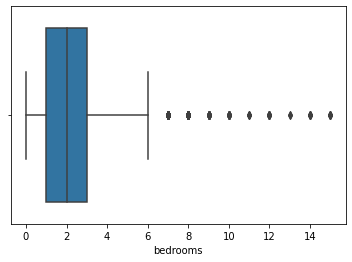

In [15]:
sns.boxplot(data = df, x = 'bedrooms')

<AxesSubplot:xlabel='bathrooms'>

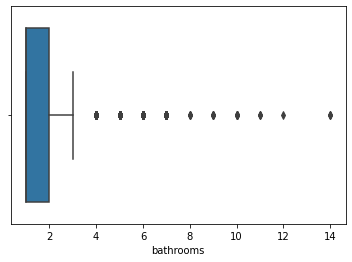

In [16]:
sns.boxplot(data = df, x = 'bathrooms')

(0.0, 2000.0)

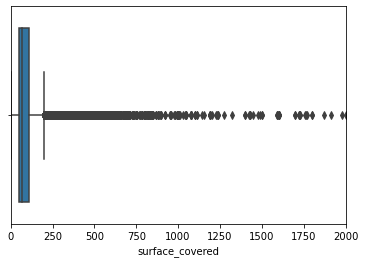

In [17]:
sns.boxplot(data = data, x = 'surface_covered')
plt.xlim(0, 2000)

(0.0, 2000.0)

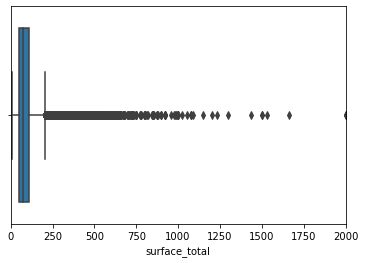

In [18]:
sns.boxplot(data = df, x = 'surface_total')
plt.xlim(0, 2000)

In [19]:
# la visualización de las variables surface_total y surface_covered no es muy comprensible
# aplico IQR para reducir los outliers de todo el conjunto de datos

In [20]:
df2_Q1 = dataframe2.quantile(0.25)
df2_Q3 = dataframe2.quantile(0.75) 
df2_QR = df2_Q3 - df2_Q1
print (df2_QR)

rooms                   2.0
bedrooms                2.0
bathrooms               1.0
surface_total          62.0
surface_covered        52.0
price              159000.0
dtype: float64


In [21]:
df2_out = dataframe2[~((dataframe2 < (df2_Q1 - 1.5 * df2_QR)) |(dataframe2 > (df2_Q3 + 1.5 * df2_QR))).any(axis=1)]
df2_out.shape

(79937, 6)

In [22]:
# verifico con nuevos gráficos para comprobar como quedó cada variable

<AxesSubplot:xlabel='surface_total'>

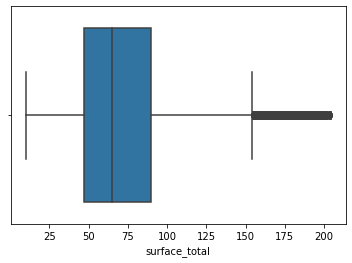

In [23]:
sns.boxplot(data = df2_out, x = 'surface_total')

<AxesSubplot:xlabel='surface_covered'>

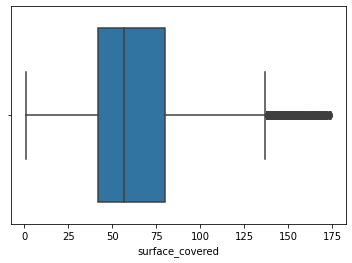

In [24]:
sns.boxplot(data = df2_out, x = 'surface_covered')

<AxesSubplot:xlabel='rooms'>

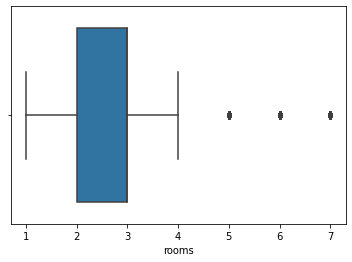

In [25]:
sns.boxplot(data = df2_out, x = 'rooms')

<AxesSubplot:xlabel='bathrooms'>

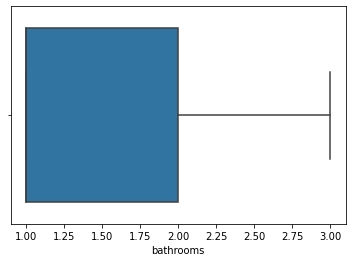

In [26]:
sns.boxplot(data = df2_out, x = 'bathrooms')

In [27]:
# verifico que no hayan quedado propiedades con mayor 'surface_covered' que 'surface_total' aplicando máscaras y que tengan una superficie mínima razonable (25 m2)

In [28]:
df3 = df2_out[df2_out['surface_covered'] < df2_out['surface_total']]
df3 = df3[df3['surface_covered'] > 25]
df3.shape

(48600, 6)

# paso a ver el tema precios en relación con las variables

<AxesSubplot:xlabel='rooms', ylabel='price'>

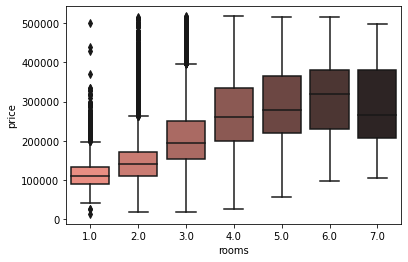

In [29]:
x = df3['rooms']
y = df3['price']
sns.boxplot(data = df3, x = 'rooms', y = 'price', palette= "dark:salmon_r")

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

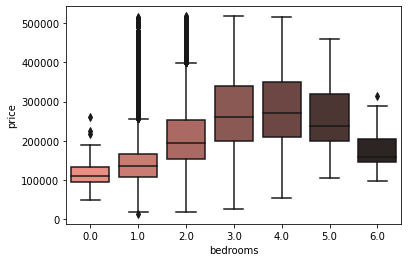

In [30]:
x = df3['bedrooms']
y = df3['price']
sns.boxplot(data = df3, x = 'bedrooms', y = 'price', palette= "dark:salmon_r")

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

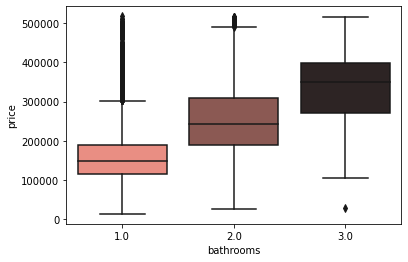

In [31]:
x = df3['bathrooms']
y = df3['price']
sns.boxplot(data = df3, x = 'bathrooms', y = 'price', palette= "dark:salmon_r")

## Al haber aplicado el método IQR Score definí el precio máximo en $$500000 aprox
## Ahora sigo con el pairplot para ver todo junto

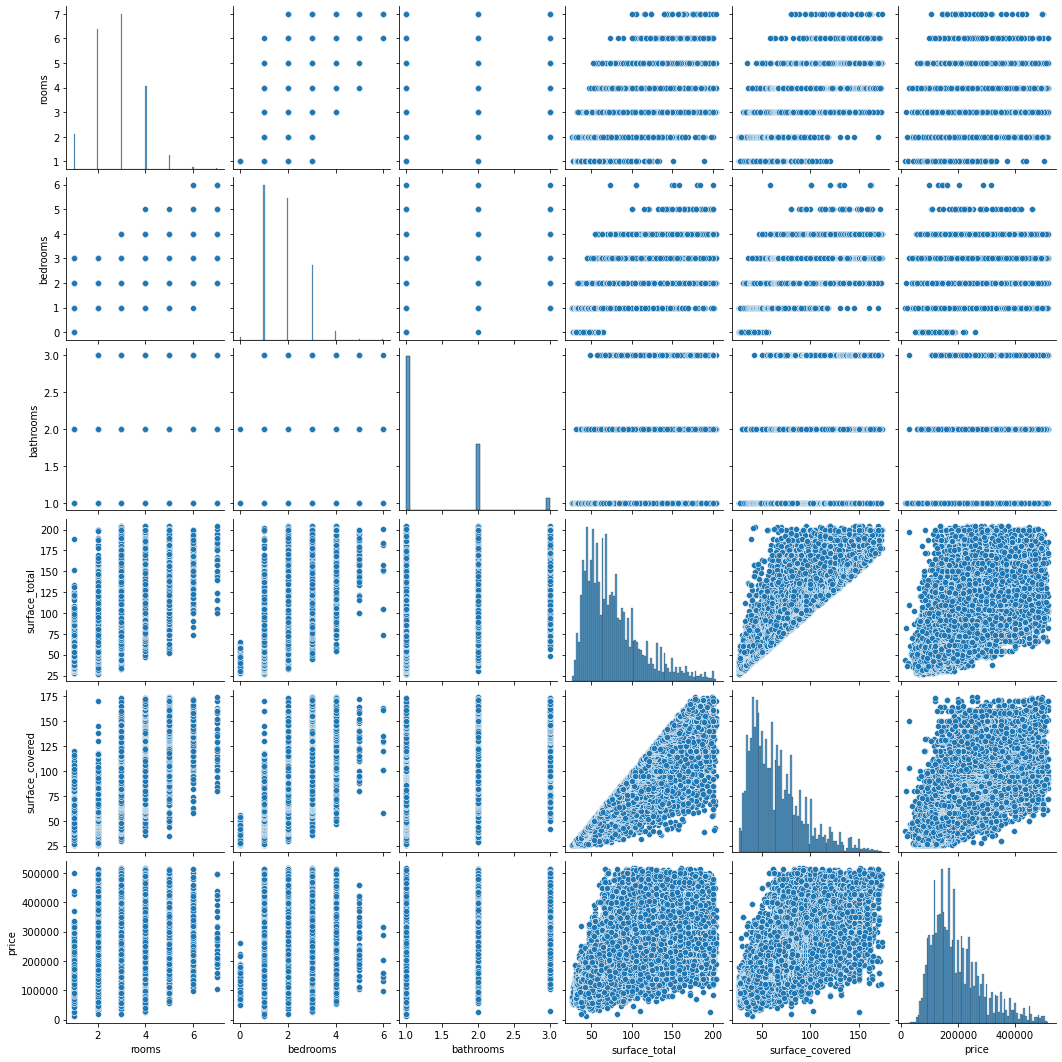

In [32]:
sns.pairplot(df3)

## Compruebo las correlaciones entre las variables

<AxesSubplot:>

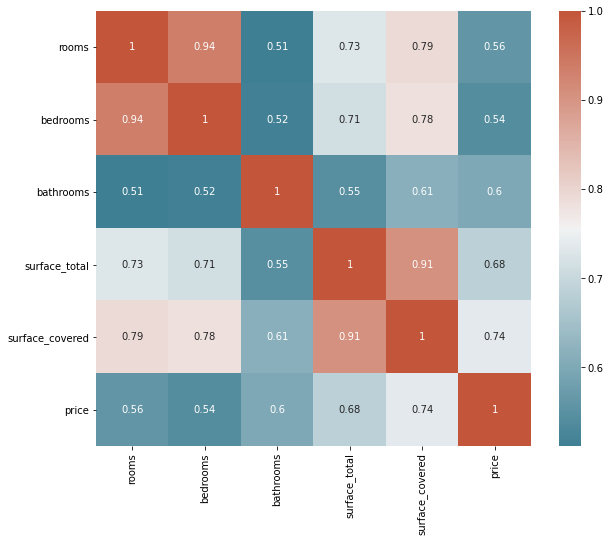

In [33]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df3.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), annot = True, cmap=sns.diverging_palette(220, 20, as_cmap=True),
               square=True, ax=ax)

## La mejor variable para fijar precios parece ser: surface_covered y como segunda opción surface_total

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


### Rehago gráfico anterior pero ahora solo con los barrios de Buenos aires capital

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]),
 [Text(0, 0, 'San Cristobal'),
  Text(1, 0, 'Boedo'),
  Text(2, 0, 'Palermo'),
  Text(3, 0, 'Villa Crespo'),
  Text(4, 0, 'Parque Patricios'),
  Text(5, 0, 'Villa Pueyrredón'),
  Text(6, 0, 'Abasto'),
  Text(7, 0, 'Flores'),
  Text(8, 0, 'Nuñez'),
  Text(9, 0, 'Almagro'),
  Text(10, 0, 'Belgrano'),
  Text(11, 0, 'Floresta'),
  Text(12, 0, 'Recoleta'),
  Text(13, 0, 'Balvanera'),
  Text(14, 0, 'Caballito'),
  Text(15, 0, 'Chacarita'),
  Text(16, 0, 'San Telmo'),
  Text(17, 0, 'Colegiales'),
  Text(18, 0, 'Villa Luro'),
  Text(19, 0, 'Barrio Norte'),
  Text(20, 0, 'Las Cañitas'),
  Text(21, 0, 'San Nicolás'),
  Text(22, 0, 'Villa Urquiza'),
  Text(23, 0, 'Parque Centenario'),
  Text(24, 0, 'Villa General Mitre'),
  Text(25, 0, 'Bo

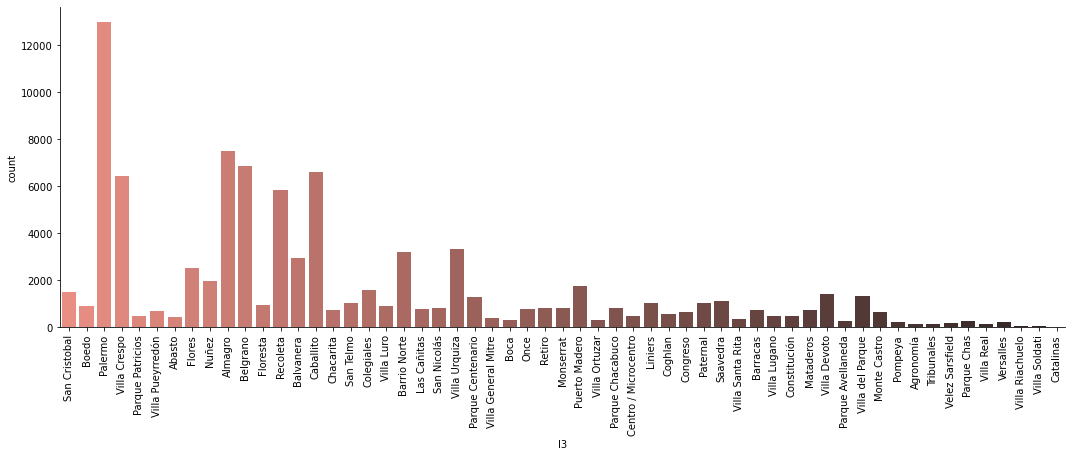

In [34]:
sns.catplot(x="l3", aspect=3 , kind="count", palette= "dark:salmon_r", data=df)

plt.xticks(rotation=90)


## El barrio más caro de Capital Federal es Palermo

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

### Métrica elegida : RMSE, para que la escala de error sea igual a la escala de objetivos

In [35]:
# Armado del dataset
dt_ml = pd.read_csv('C:/Users/Riggio/Desktop/Tel/Data Science/proyecto_1/DS_Proyecto_01_Datos_Properati.csv')

In [36]:
# selecciono la región 
df_ml = dt_ml[dt_ml['l2'] == 'Capital Federal']

In [37]:
# selecciono tipos de propiedad
df_ml = df_ml[(df_ml['property_type'] == 'Departamento') | (df_ml['property_type'] =='Casa') | (df_ml['property_type'] == 'PH')]

In [38]:
# aplico máscaras para seleccionar solo las propiedades que tengan entre 15 y 1000 m2
df_ml = df_ml[df_ml['surface_total'] >= 15] 
df_ml = df_ml[df_ml['surface_total'] <= 1000]

In [39]:
# sigo aplicando máscaras esta vez para fijar el límite de precio
df_ml = df_ml[df_ml['price'] <= 4000000]

In [40]:
df2_ml = df_ml[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

In [41]:
# verifico valores nulos
df2_ml.isnull().sum()

rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
price                0
dtype: int64

In [42]:
# dropping null values ( no se me ocurre una frase en español que le corresponda a esa frase)
df2_ml = df2_ml.dropna()

### Checkpoint

In [43]:
df2_ml.shape

(81019, 6)

### Selección de las variables predictoras (X) y la variable a predecir (y).

In [44]:
X = df2_ml[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
y = df2_ml['price']

In [45]:
X.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,7.0,7.0,2.0,140.0,140.0
1,2.0,1.0,2.0,70.0,58.0
2,2.0,1.0,1.0,45.0,45.0
3,2.0,1.0,1.0,85.0,50.0
5,2.0,1.0,1.0,56.0,56.0


In [46]:
y.head()

0    153000.0
1    159000.0
2    125000.0
3    295000.0
5    150000.0
Name: price, dtype: float64

### Importación de los modelos a utilizar

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

### Divido el dataset para entrenamiento y prueba

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


In [49]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=2)

### Entreno (prueba 1, con el dataset del checkpoint)

In [50]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [51]:
print(linear_model.coef_, linear_model.intercept_)

[ 1.16192981e+04 -6.29435576e+04  1.32759235e+05  2.05427168e+03
  1.07004571e+02] -56646.24807942542


### Verifico error y predicción de cada modelo

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361575


g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


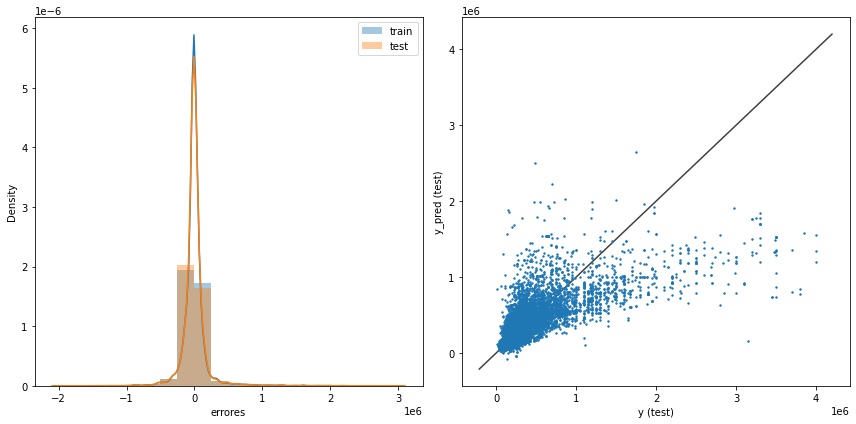

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 191783.485243933
Raíz del error cuadrático medio en Test: 194688.15091192327


g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


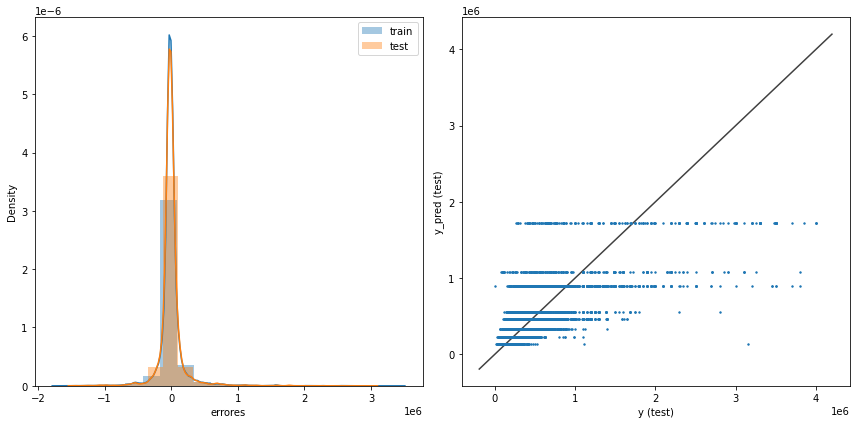

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 92435.07024633957
Raíz del error cuadrático medio en Test: 153607.76698581807


g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


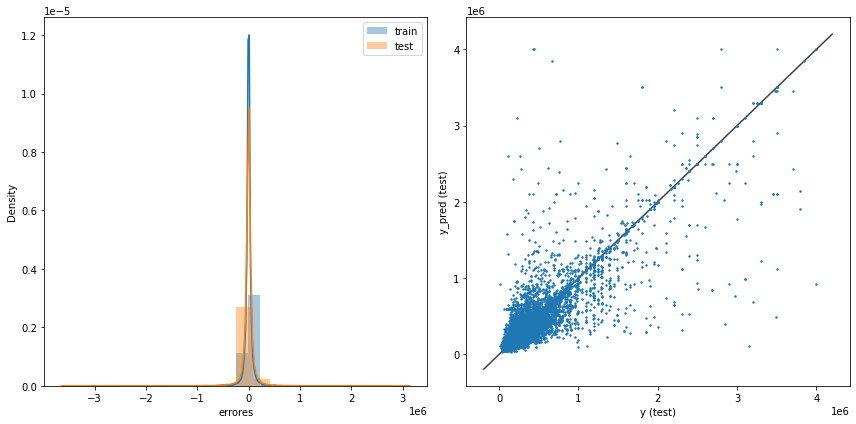

In [52]:
from sklearn.metrics import mean_squared_error
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}') #print ('Modelo : ' + modelos[i] )

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (12,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [53]:
# en vista de los resultados busco mejorar los hiperparámetros

In [54]:
# primero el árbol de decisión
lista_RMSE_train = []
lista_RMSE_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf =  DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento 
    y_train_pred = clf.predict(X_train)  
    train_kn = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_kn = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_RMSE_train.append(train_kn)
    lista_RMSE_test.append(test_kn)

Text(0, 0.5, 'RMSE')

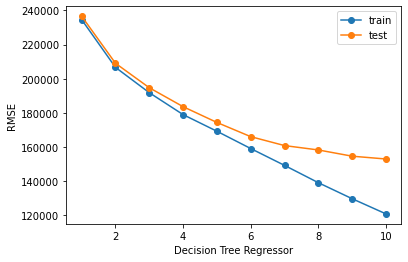

In [55]:
plt.plot(max_depths,lista_RMSE_train,'o-',label='train' )
plt.plot(max_depths,lista_RMSE_test,'o-',label='test')
plt.legend()
plt.xlabel('Decision Tree Regressor')
plt.ylabel('RMSE')

In [56]:
# ahora el k- vecinos
lista_k_RMSE_train = []
lista_k_RMSE_test = []


# Defino la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_kn =  np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_kn = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_k_RMSE_train.append(train_kn)
    lista_k_RMSE_test.append(test_kn)



Text(0, 0.5, 'RMSE')

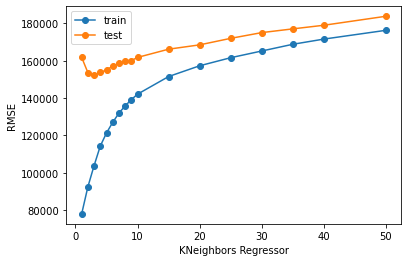

In [57]:
plt.plot(k_vecinos,lista_k_RMSE_train,'o-',label='train' )
plt.plot(k_vecinos,lista_k_RMSE_test,'o-',label='test')
plt.legend()
plt.xlabel('KNeighbors Regressor')
plt.ylabel('RMSE')


### Intento mejorar el desempeño de los modelos optimizando los hiperparámetros observados en los plots anteriores (prueba 2, mismo dataset del checkpoint, diferentes hiperparámetros)

In [58]:
tree_regressor = DecisionTreeRegressor(max_depth=6, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=20)

In [59]:
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [60]:
print(linear_model.coef_, linear_model.intercept_)

[ 1.16192981e+04 -6.29435576e+04  1.32759235e+05  2.05427168e+03
  1.07004571e+02] -56646.24807942542


Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361575


g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


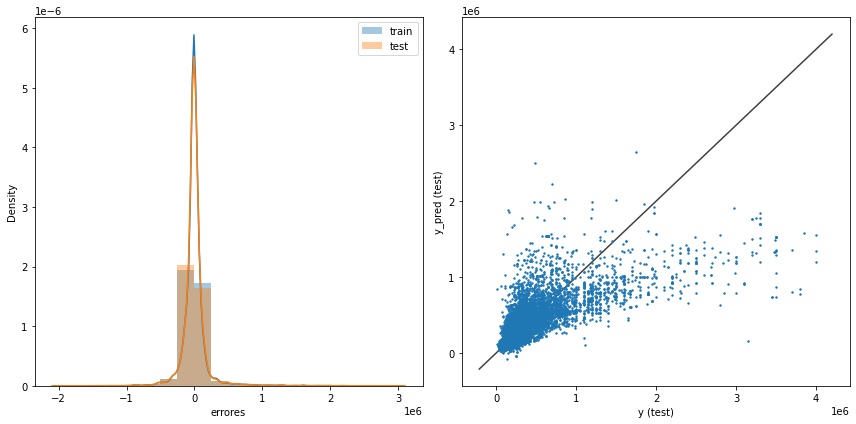

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 159067.539460302
Raíz del error cuadrático medio en Test: 166034.1200011022


g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


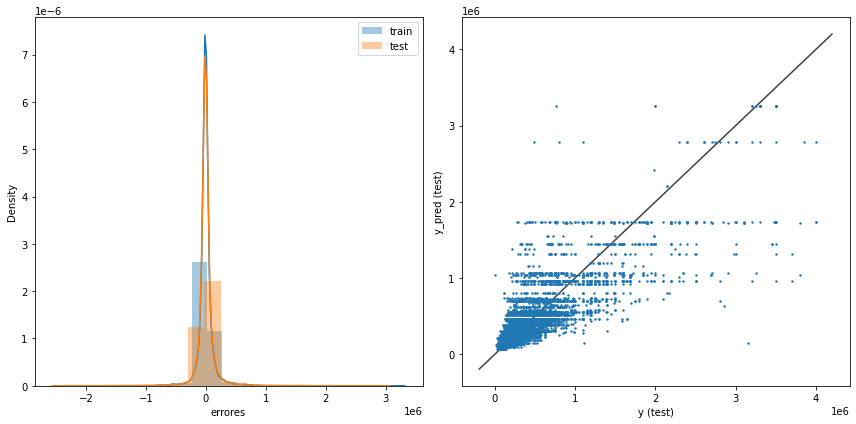

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 157270.19222071065
Raíz del error cuadrático medio en Test: 168471.41876337957


g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


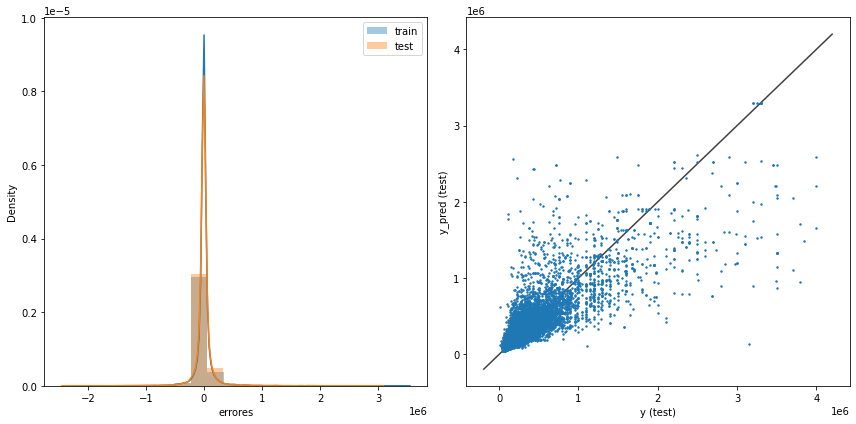

In [61]:
from sklearn.metrics import mean_squared_error
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}') #print ('Modelo : ' + modelos[i] )

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (12,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### Me surgió la duda de cuánto podrían estar afectando los outliers a los diferentes modelos, por lo que armo un nuevo dataset utilizando el IQR con el fin de eliminarlos y comprobar qué sucede (prueba 3, modifico dataset, uso hiperparámetros de prueba 1)

In [62]:
df2_Q1 = df2_ml.quantile(0.25)
df2_Q3 = df2_ml.quantile(0.75) 
df2_QR = df2_Q3 - df2_Q1
print (df2_QR)

rooms                   2.0
bedrooms                2.0
bathrooms               1.0
surface_total          62.0
surface_covered        52.0
price              155000.0
dtype: float64


In [63]:
df2_out = df2_ml[~((df2_ml < (df2_Q1 - 1.5 * df2_QR)) |(df2_ml > (df2_Q3 + 1.5 * df2_QR))).any(axis=1)]
df2_out.shape

(70399, 6)

In [64]:
X = df2_out[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
y = df2_out['price']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(49279, 5) (49279,) (21120, 5) (21120,)


In [66]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=2)

In [67]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [68]:
print(linear_model.coef_, linear_model.intercept_)

[  2859.72417259 -16505.1607681   40473.94147339    604.68760487
   1529.11151235] 10979.3031875694


Modelo : Regresión lineal
Raíz del error cuadrático medio en Train: 57696.22107192323
Raíz del error cuadrático medio en Test: 58181.11904143537


g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


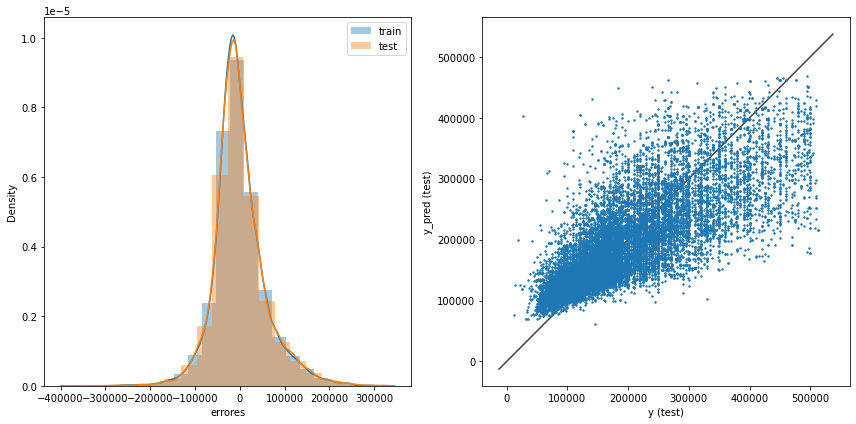

Modelo : Árbol de Decisión
Raíz del error cuadrático medio en Train: 59597.137116206526
Raíz del error cuadrático medio en Test: 59954.95475753221


g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


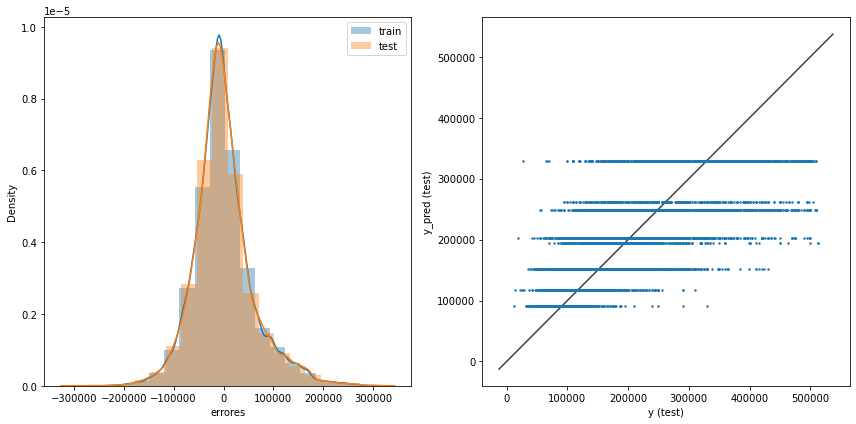

Modelo : Vecinos más cercanos
Raíz del error cuadrático medio en Train: 43995.81189286476
Raíz del error cuadrático medio en Test: 54602.73000146905


g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


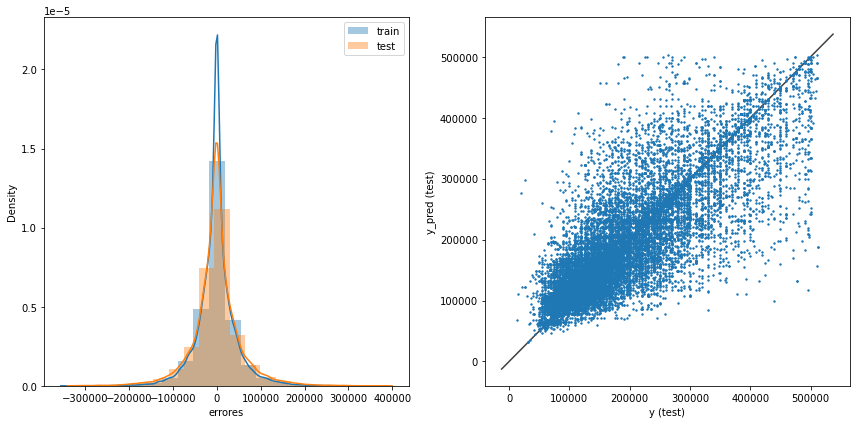

In [69]:
modelos_2 = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print('Modelo : ' + modelos_2[i]) 

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (12,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### Los datos se ven mucho más agrupados, procedo a evaluar la métrica

In [97]:
lista_RMSE_train = []
lista_RMSE_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf =  DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento 
    y_train_pred = clf.predict(X_train)  
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_RMSE_train.append(train_rmse)
    lista_RMSE_test.append(test_rmse)

Text(0, 0.5, 'RMSE')

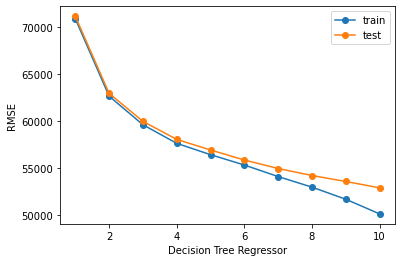

In [98]:
plt.plot(max_depths,lista_RMSE_train,'o-',label='train' )
plt.plot(max_depths,lista_RMSE_test,'o-',label='test')
plt.legend()
plt.xlabel('Decision Tree Regressor')
plt.ylabel('RMSE')

In [99]:
# ahora el k- vecinos
lista_k_RMSE_train = []
lista_k_RMSE_test = []


# Defino la lista de valores de k que vamos a explorar
k_vecinos_2 = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos_2:
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_kn =  np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_kn = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_k_RMSE_train.append(train_kn)
    lista_k_RMSE_test.append(test_kn)

Text(0, 0.5, 'RMSE')

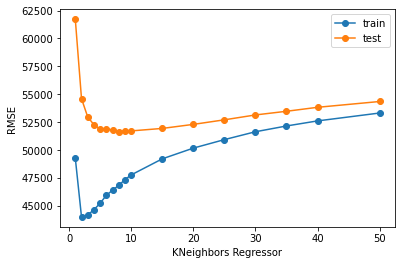

In [100]:
plt.plot(k_vecinos,lista_k_RMSE_train,'o-',label='train' )
plt.plot(k_vecinos,lista_k_RMSE_test,'o-',label='test')
plt.legend()
plt.xlabel('KNeighbors Regressor')
plt.ylabel('RMSE')

### Última prueba  con los valores observados en los plots (prueba 4, con el dataset modificado y nuevos hiperparámetros)

In [102]:
tree_regressor = DecisionTreeRegressor(max_depth=9, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=20)

In [103]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [104]:
print(linear_model.coef_, linear_model.intercept_)

[  2859.72417259 -16505.1607681   40473.94147339    604.68760487
   1529.11151235] 10979.3031875694


Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 57696.22107192323
Raíz del error cuadrático medio en Test: 58181.11904143537


g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


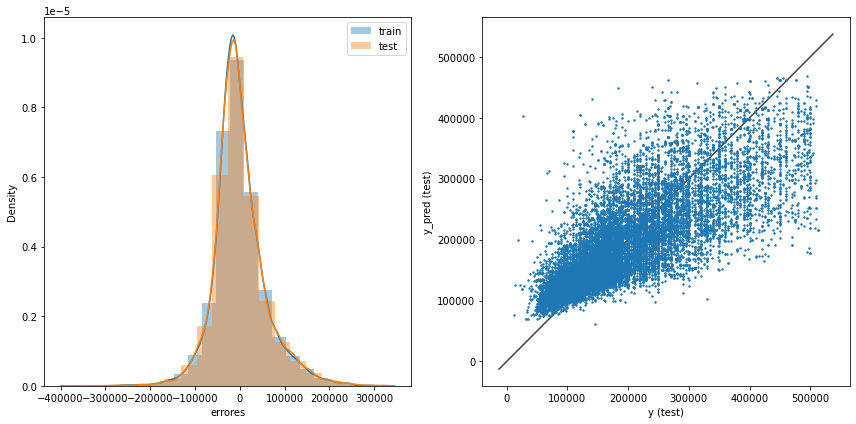

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 51680.50519135009
Raíz del error cuadrático medio en Test: 53568.27566084787


g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


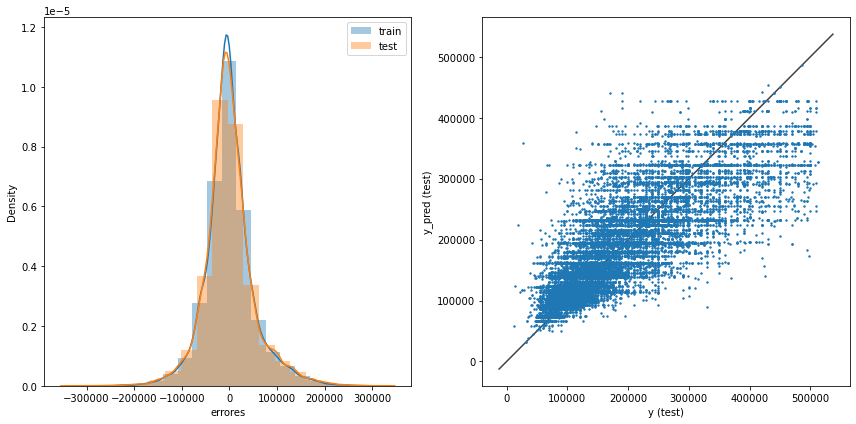

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 50167.060512256154
Raíz del error cuadrático medio en Test: 52295.76514646835


g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\Users\Riggio\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


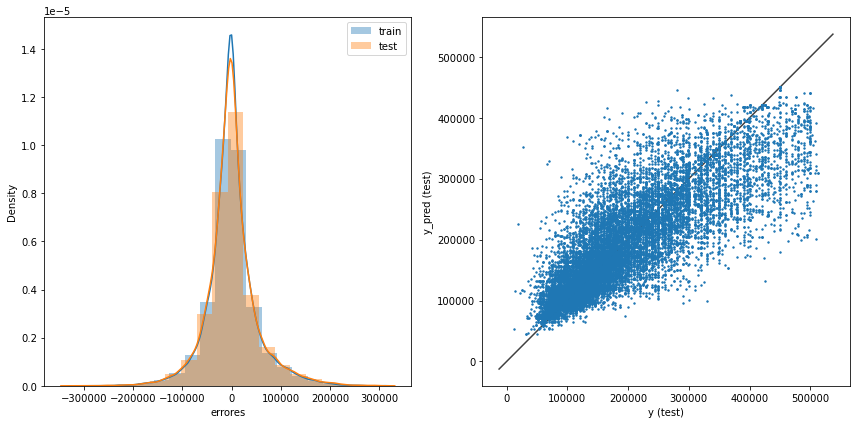

In [105]:
modelos_3 = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print('Modelo: ' + modelos_3[i]) #print ('Modelo : ' + modelos[i] )

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (12,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### De todas las pruebas realizadas  elijo el modelo K - NN Regressor, en particular en la prueba 4, aunque muestra mayor margen de error que el árbol de decisión, no tiende tanto al sobreajuste como se ve en los gráficos de error.

### Como crítica, considero que debería conocer aún más el dataset y probar los modelos con más hiperpárámetros